In [1]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from random import shuffle

Using dlib Library, we can extract facial regions from input images.

'shape_predictor_68_face_landmarks' model is used for extraction.


In [36]:
import pickle
import matplotlib.pyplot as plt
import dlib

model_path = "C:/Users/pavan/Downloads/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(model_path)

Labels can be discovered from 4th char in 1st row

If it is 0 Then it is a no-pain image Else pain image

In [37]:
def create_train_data(TRAIN_DIR, LABEL_DIR):
    c0=0
    c1=0
    res=0
    
    training_data = []
    label_data = []
    
    for folder in os.listdir( LABEL_DIR ):
        c0=0
        
        for inner_folder in os.listdir( (LABEL_DIR+'/'+folder) ):
            path = os.path.join(LABEL_DIR, folder+'/'+inner_folder)
            
            for text_file in os.listdir( (path) ):
                text_file = os.path.join(path+'/'+text_file)
                with open(text_file) as opened_file:
                    lines = opened_file.readlines()
                    if(lines[0][3]=='0' and c0<340):
                        label_data.append(0)
                        res+=1
                        c0+=1
                    if(lines[0][3]!='0'):
                        label_data.append(1)
                        c1+=1
                    opened_file.close()
    
    label_data.append(-1)
    print(str(res)+ ' '+str(c1))
    
    c=0
    c0=0
    c1=0
    res=0
    print(len(label_data))
    
    for folder in os.listdir(TRAIN_DIR):
        c0=0
        for inner_folder in os.listdir( (TRAIN_DIR+'/'+folder) ):
            path = os.path.join(TRAIN_DIR, folder+'/'+inner_folder)
            for img in tqdm( os.listdir(path) ):
                img = os.path.join(path+'/'+img)
                img_data = cv2.imread(img, cv2.IMREAD_COLOR)
                
                # PRE-PROCESSING & FACE DETECTION
                
                faces = detector(img_data)
                for face in faces:
                    x,y,w,h = face.left(), face.top(), face.width(), face.height()
                    cv2.rectangle(img_data, (x,y), (x+y,w+h),(0,255,0),2)
                detected_face = img_data[y:y+h,x:x+w]
                img_data = cv2.resize(img_data, (200,200), interpolation=cv2.INTER_LINEAR)
                img_data = cv2.cvtColor(img_data, cv2.COLOR_RGB2BGR)
                
                if (label_data[c]==-1):break
                    
                # TRAINING_DATA = LISTOF([image_array, Label])
                if (label_data[c]==0 and c0<340):
                    training_data.append([np.array(img_data), label_data[c]])
                    c0+=1
                    res+=1
                    c+=1
                if (label_data[c]!=0):
                    training_data.append([np.array(img_data), label_data[c]])
                    c+=1
                    c1+=1
                    
    print(str(res)+' '+str(c1))
    shuffle(training_data)
    return training_data

Above fun prints no. of no-pain images, pain images, Total no. of images 

In [38]:
TRAIN_DIREC = 'E:/Linear Regression/Train/SAS/Images/Images'
LABEL_DIREC = 'E:/Linear Regression/Train/SAS/Frame_Labels/Frame_Labels/PSPI'

train_data = create_train_data(TRAIN_DIREC,LABEL_DIREC)

1360 1747
3108


 14%|███████████▏                                                                     | 58/420 [00:00<00:04, 75.60it/s]


1360 1747


In [39]:
pickle_out = open("train_data_latest.pickle", "wb")
pickle.dump(train_data, pickle_out)
pickle_out.close()

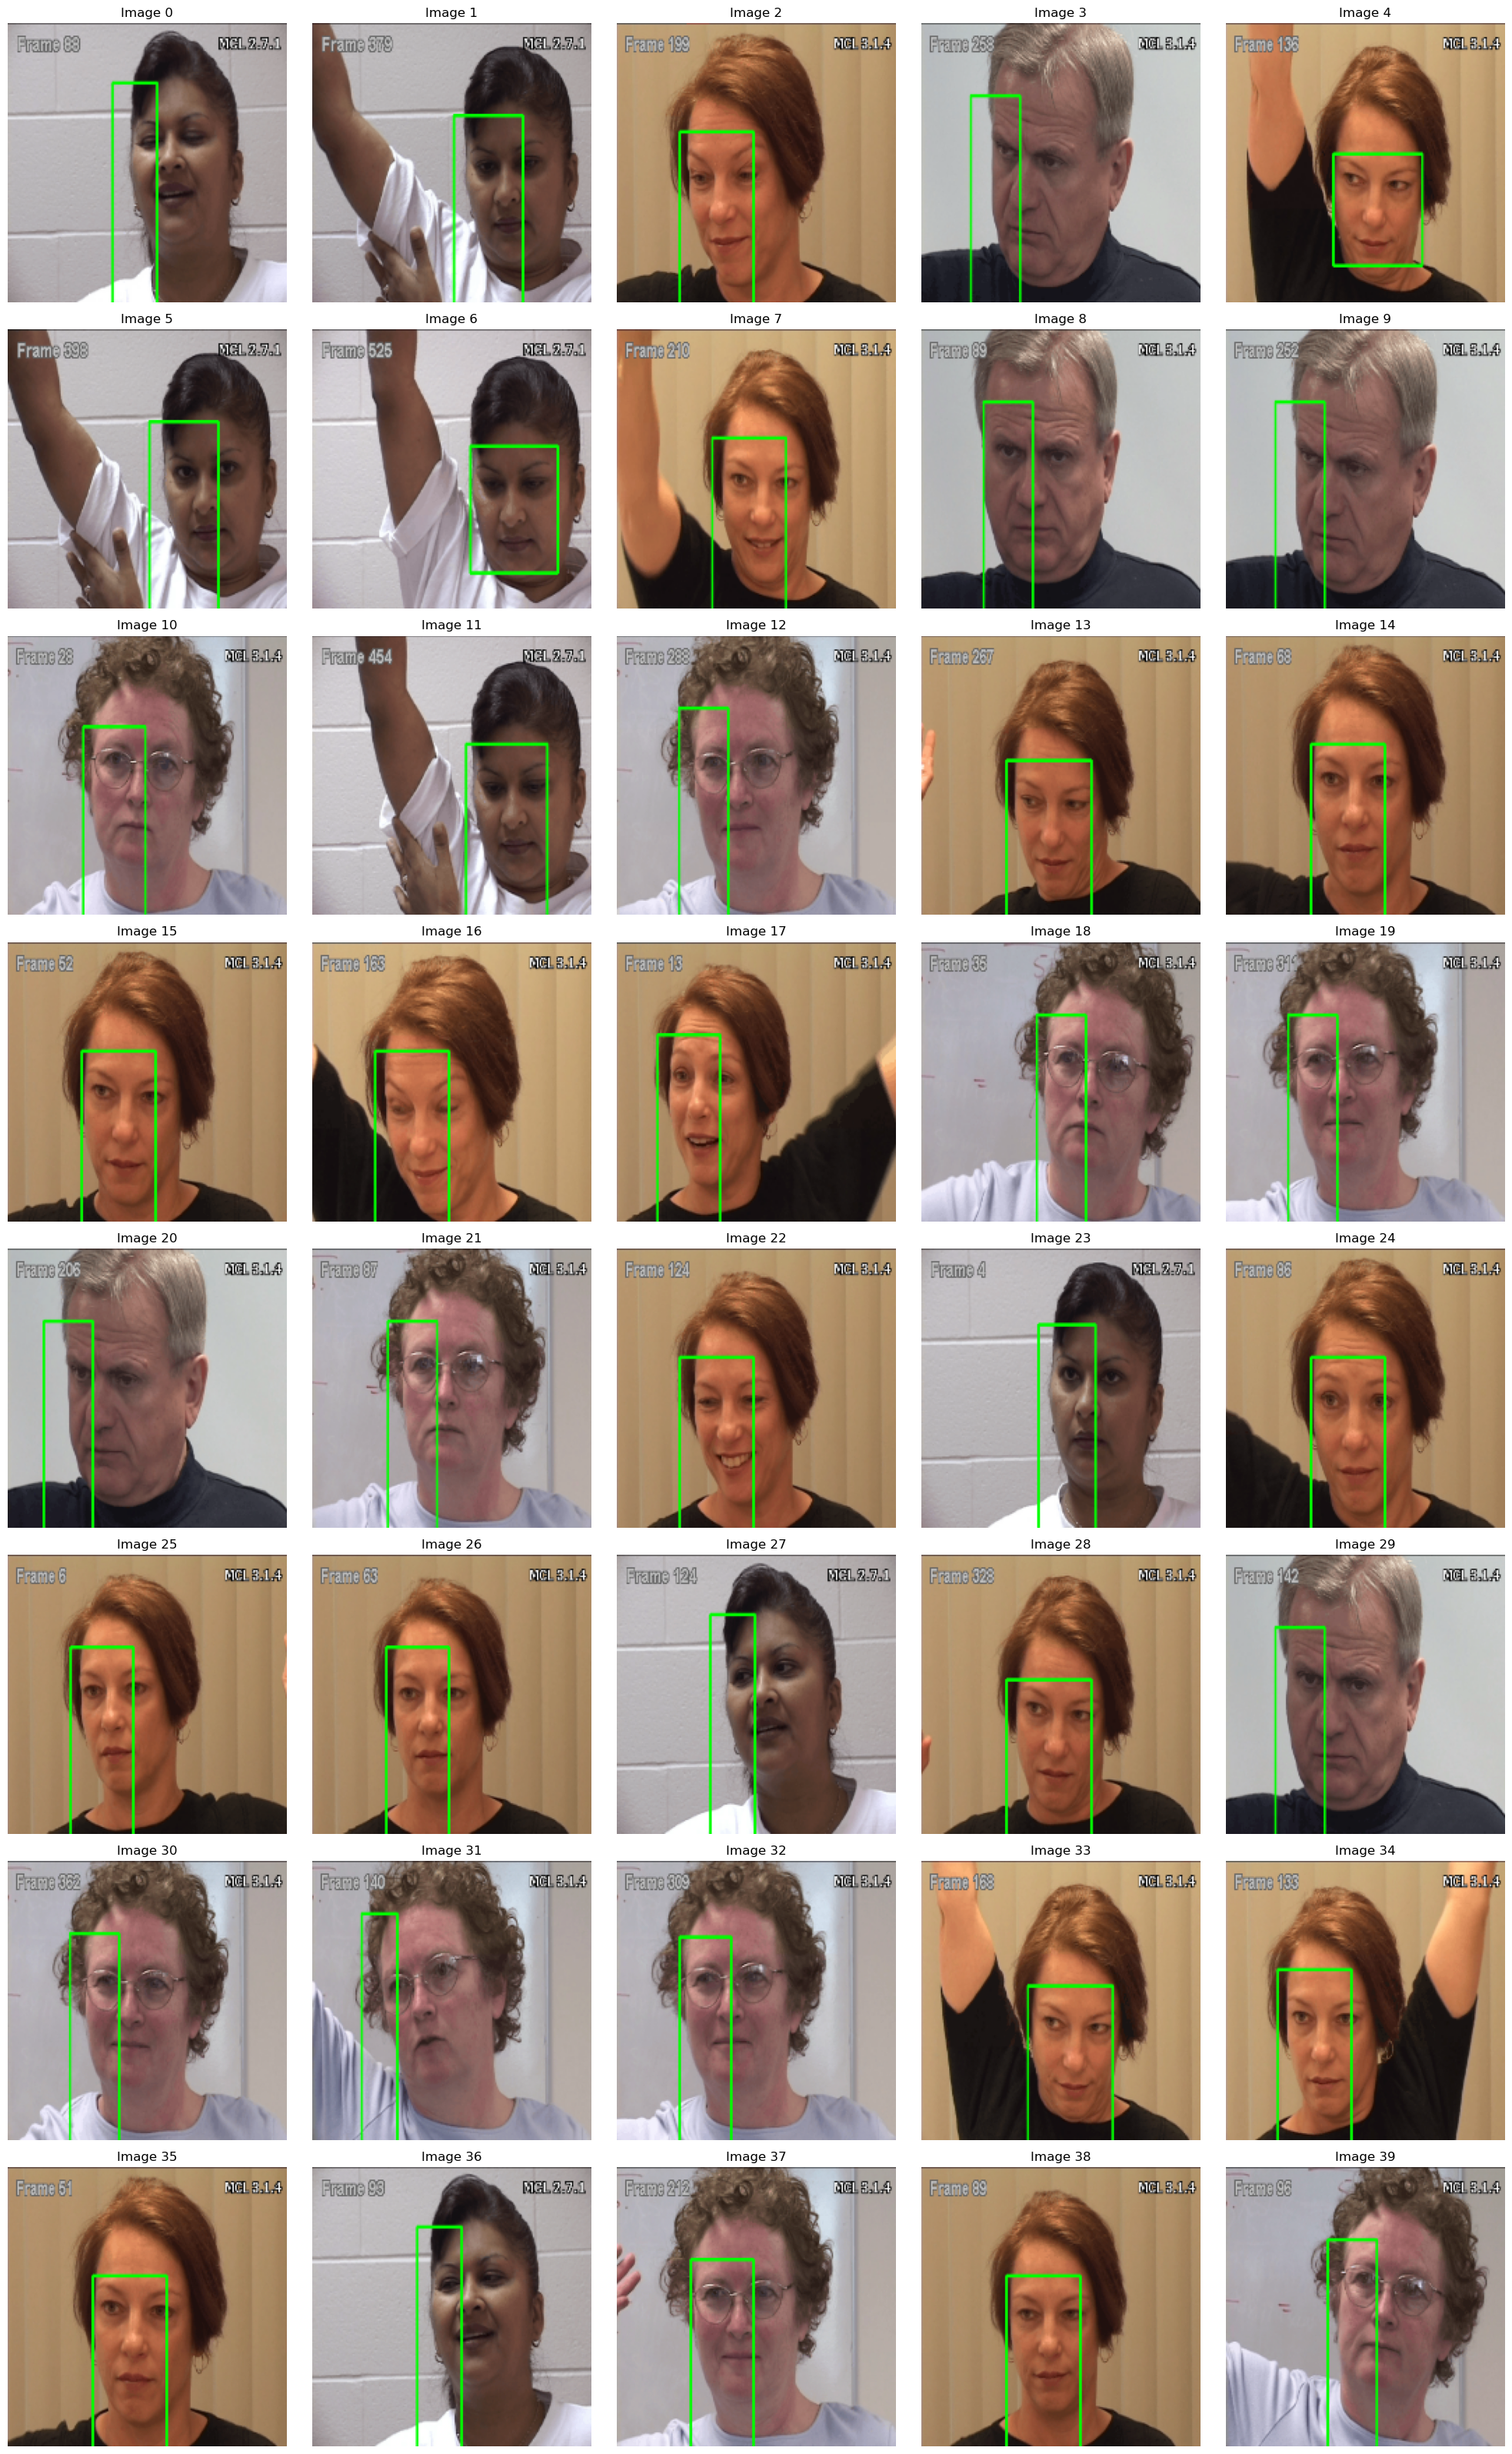

In [69]:
# Assuming 'images_list' is your list of images
images_list = [train_data[i][0] for i in range(40)]

# Set the number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_rows = len(images_list) // images_per_row + (1 if len(images_list) % images_per_row else 0)

plt.figure(figsize=(20, 4 * num_rows))

for i, img in enumerate(images_list):
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img, cmap='gray')  # Use cmap='gray' if the images are grayscale
    plt.title(f'Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
%%cmd
where python


In [ ]:
%%cmd
pip install cmake

In [ ]:
%%cmd
python --version

In [ ]:
%%cmd
pip install "C:\Users\pavan\Downloads\dlib-19.24.1-cp311-cp311-win_amd64.whl"

In [ ]:
import dlib